### **Estimación de precios de autos utilizando técnicas de machine learning**

Se utiliza un dataset que contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características utilizando diferentes modelos de machine learning.


Dataset disponible en: https://www.kaggle.com/datasets/toramky/automobile-dataset?resource=download

### **1. Importación de librerias y dataset**

In [1]:
# librerias 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
# dataset
df = pd.read_csv('Automobile_data.csv')
df.head(5).T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


### **2. Análisis exploratorio**

In [3]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [5]:
# verifcar normalized losses
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

Los datos en la columna "normalized losses" tiene un simbolo "?" que en realidad está representando datos faltantes, por tanto se va rellenar con Nan

In [6]:
# reemplazar ? con Nan
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan)
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [7]:
# convertir a float
df['normalized-losses'] = df['normalized-losses'].astype(float)

In [8]:
# tipos de datos
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.0
symboling,205,0,0.0
highway-mpg,205,0,0.0
city-mpg,205,0,0.0
peak-rpm,205,0,0.0
horsepower,205,0,0.0
compression-ratio,205,0,0.0
stroke,205,0,0.0
bore,205,0,0.0
fuel-system,205,0,0.0


El dataset muestra valores faltantes en el normalized-losses.

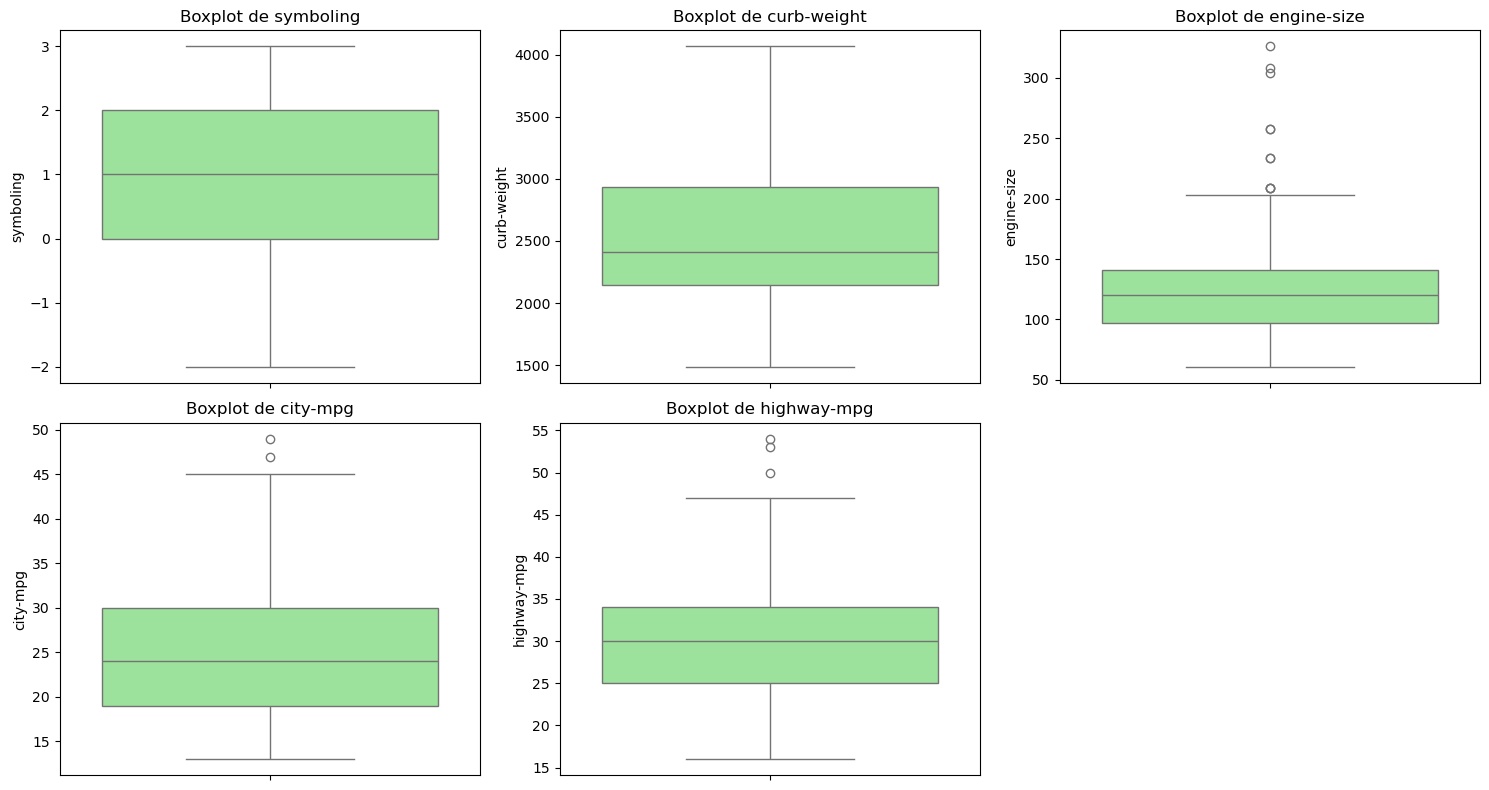

In [10]:
# extraer columnas numericas 
numerical_columns = df.select_dtypes(include=['int64']).columns

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(2, 3, i)  
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logran algunos outliers en engine size, city and highway

In [11]:
# engine size 
# valores unicos
print(df['engine-size'].unique())

# estadisticas de price
print('Estadisticas de engine-size:\n', df['engine-size'].describe())

[130 152 109 136 131 108 164 209  61  90  98 122 156  92  79 110 111 119
 258 326  91  70  80 140 134 183 234 308 304  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]
Estadisticas de engine-size:
 count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64


In [12]:
# city
# valores unicos
print(df['city-mpg'].unique())

# estadisticas de price
print('Estadisticas de city-mpg:\n', df['city-mpg'].describe())

[21 19 24 18 17 16 23 20 15 47 38 37 31 49 30 27 25 13 26 36 22 14 45 28
 32 35 34 29 33]
Estadisticas de city-mpg:
 count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64


In [13]:
# highway
# valores unicos
print(df['highway-mpg'].unique())

# estadisticas de price
print('Estadisticas de highway-mpg:\n', df['highway-mpg'].describe())

[27 26 30 22 25 20 29 28 53 43 41 38 24 54 42 34 33 31 19 17 23 32 39 18
 16 37 50 36 47 46]
Estadisticas de highway-mpg:
 count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highway-mpg, dtype: float64


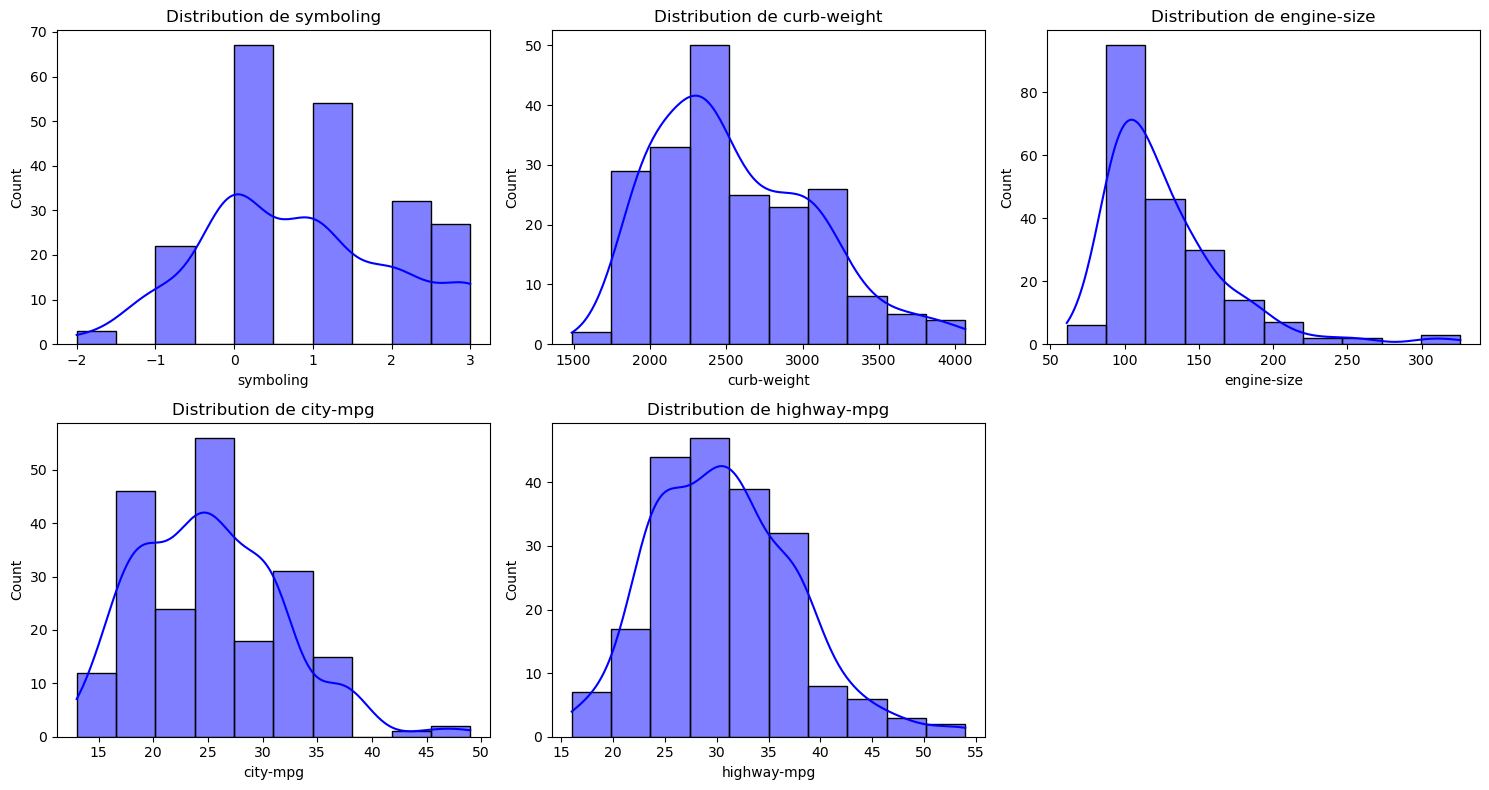

In [14]:
# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

In [18]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [19]:
# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

In [20]:
# identificar sus valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'make': ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Columna 'fuel-type': ['gas' 'diesel']
Columna 'aspiration': ['std' 'turbo']
Columna 'num-of-doors': ['two' 'four' '?']
Columna 'body-style': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Columna 'drive-wheels': ['rwd' 'fwd' '4wd']
Columna 'engine-location': ['front' 'rear']
Columna 'engine-type': ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Columna 'num-of-cylinders': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Columna 'fuel-system': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Columna 'bore': ['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '?' '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74'

En la columna num of doors hay simbolo ? en valores faltantes

In [21]:
# como son las columnas con ?
df[df['num-of-doors'] == '?'].T

,27,63
symboling,1,0
normalized-losses,148.0,NaN
make,dodge,mazda
fuel-type,gas,diesel
aspiration,turbo,std
num-of-doors,?,?
body-style,sedan,sedan
drive-wheels,fwd,fwd
engine-location,front,front
wheel-base,93.7,98.8


Como los datos que tienen "?" son del tipo sedam y son solo 2, se va rellenar con que el numero de puertas es 4

In [22]:
# reemplazar con el numero 4
df['num-of-doors'] = df['num-of-doors'].replace('?', 4)

# verificar el output
df[df['num-of-doors'] == '?'].T

""
symboling
normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
wheel-base


Nuevamente, en las columnas bore, stroke, horsepower, peak-rpm y price se tienen simbolos de "?" que representan datos faltantes y por eso son reconocidos como object. A continuacion se procede a reemplazar el ? por Nan

In [23]:
# reemplazar ? con Nan
df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].replace('?', np.nan)

# extraer las columnas tipo object
object_columns = df.select_dtypes(include=['object'])

# identificar valores unicos 
for column in object_columns:
    unique_values = object_columns[column].unique()
    print(f"Columna '{column}': {unique_values}")

Columna 'make': ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Columna 'fuel-type': ['gas' 'diesel']
Columna 'aspiration': ['std' 'turbo']
Columna 'num-of-doors': ['two' 'four' 4]
Columna 'body-style': ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Columna 'drive-wheels': ['rwd' 'fwd' '4wd']
Columna 'engine-location': ['front' 'rear']
Columna 'engine-type': ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Columna 'num-of-cylinders': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Columna 'fuel-system': ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Columna 'bore': ['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' nan '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '

Verificar nuevamente los datos faltantes

In [24]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
price,201,4,1.95
stroke,201,4,1.95
bore,201,4,1.95
peak-rpm,203,2,0.98
horsepower,203,2,0.98
highway-mpg,205,0,0.00
city-mpg,205,0,0.00
compression-ratio,205,0,0.00
fuel-system,205,0,0.00


Los datos faltantes son menos del 2% y se toma la decision de eliminarlos del dataset

In [25]:
# columnas object que son numero a float
columnas_para_convertir = ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[columnas_para_convertir] = df[columnas_para_convertir].astype(float)

# verificar output
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

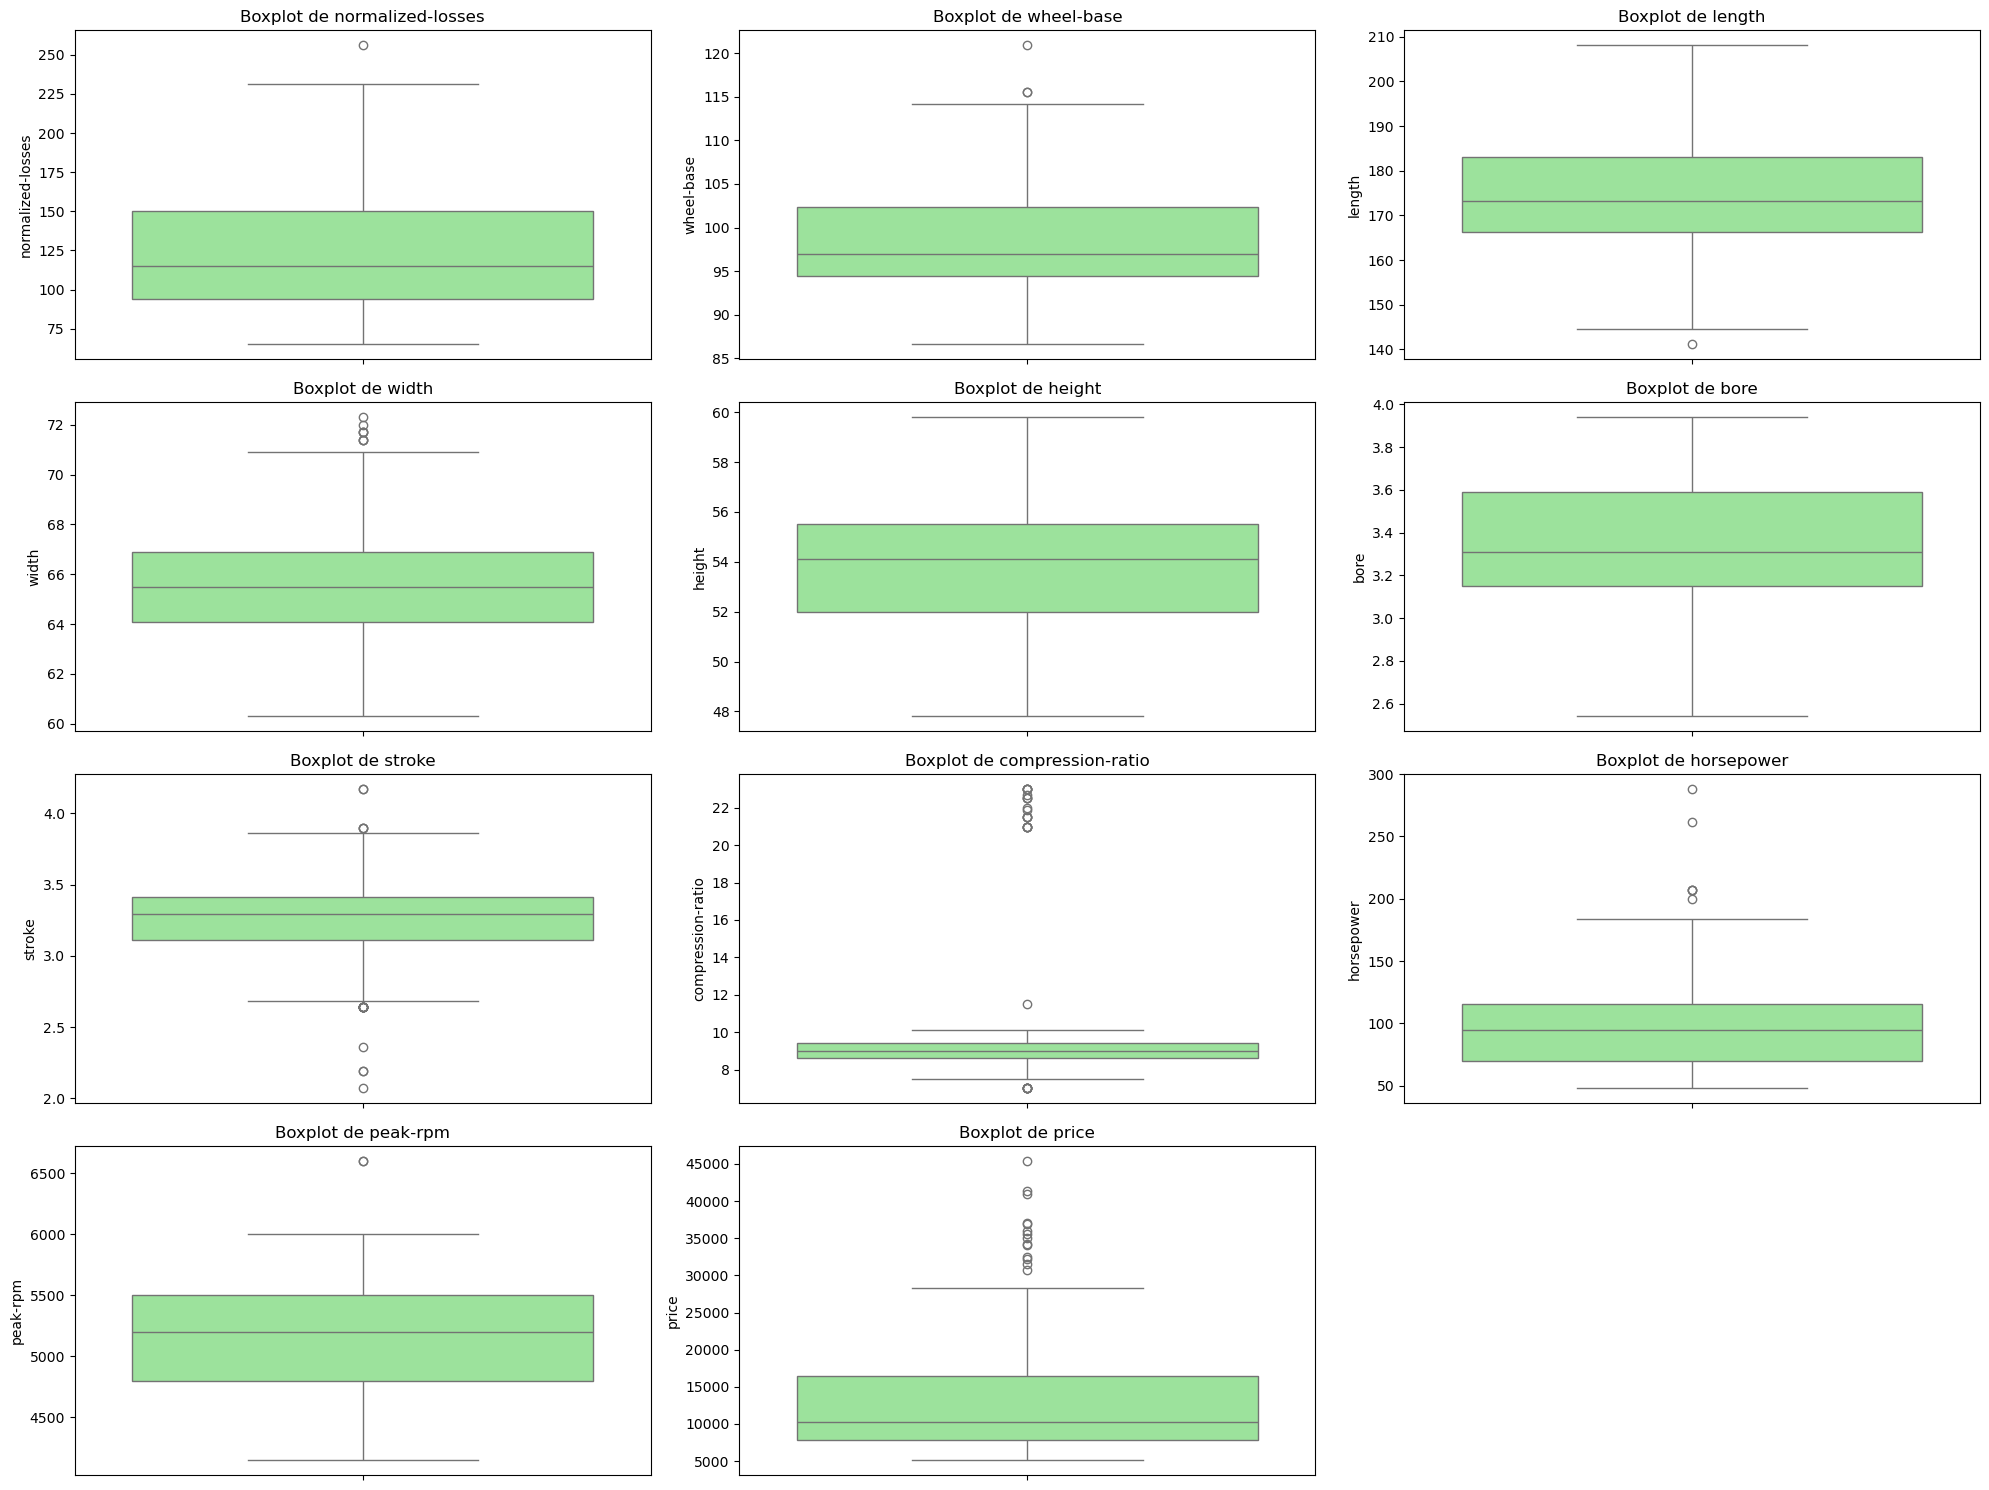

In [26]:
# extraer columnas numericas 
numerical_columns = df.select_dtypes(include=['float64']).columns

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

# crear boxplots 
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i)  
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

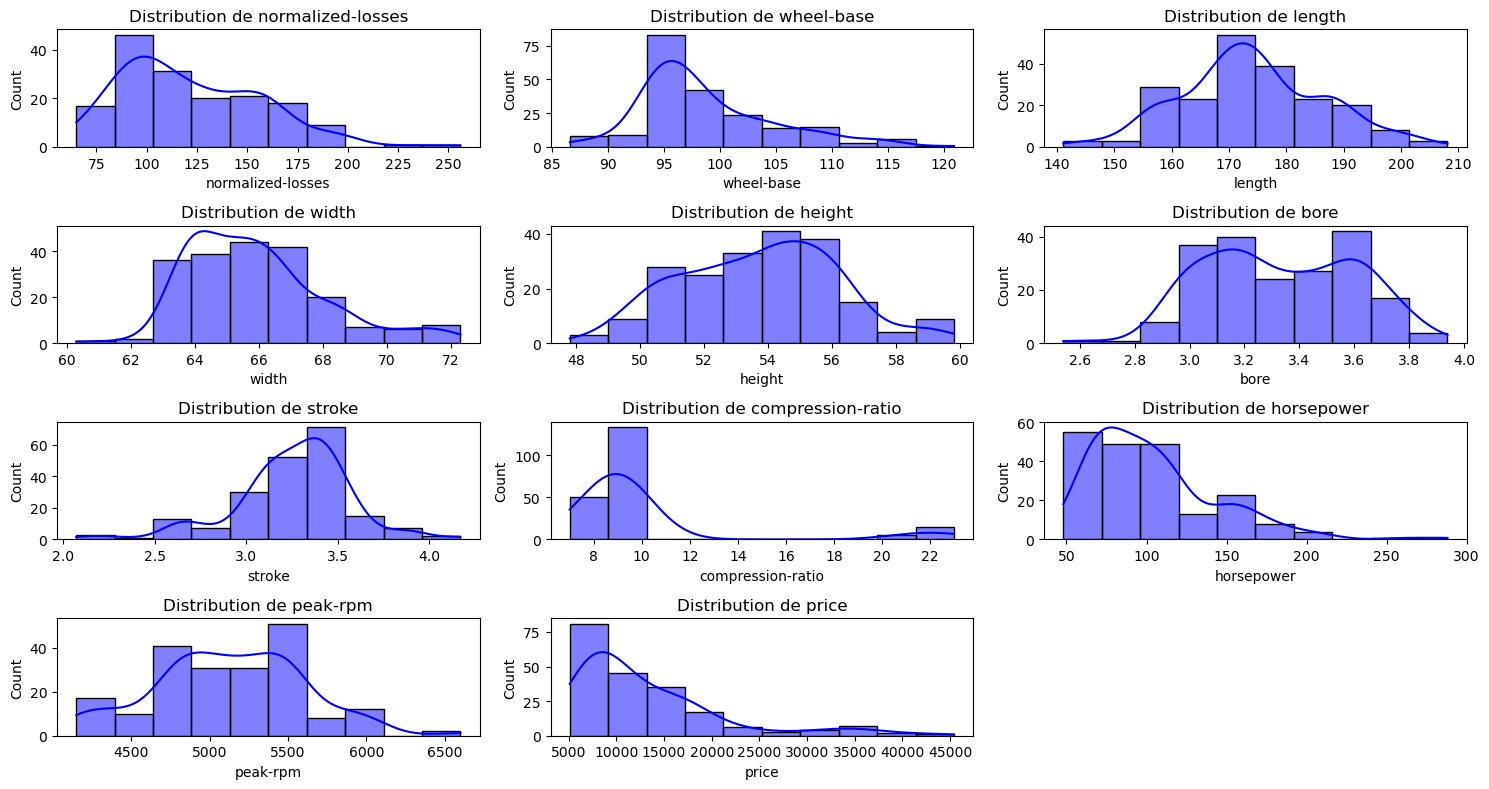

In [27]:
# distribucion de los datos
plt.figure(figsize=(15, 8))

# numero de columnas y filas
cols = 3
filas = (len(numerical_columns) // cols) + (len(numerical_columns) % cols > 0)

for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(filas, cols, i)   
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Con un mapa de calor se visualizaran las correlaciones entre las variables.

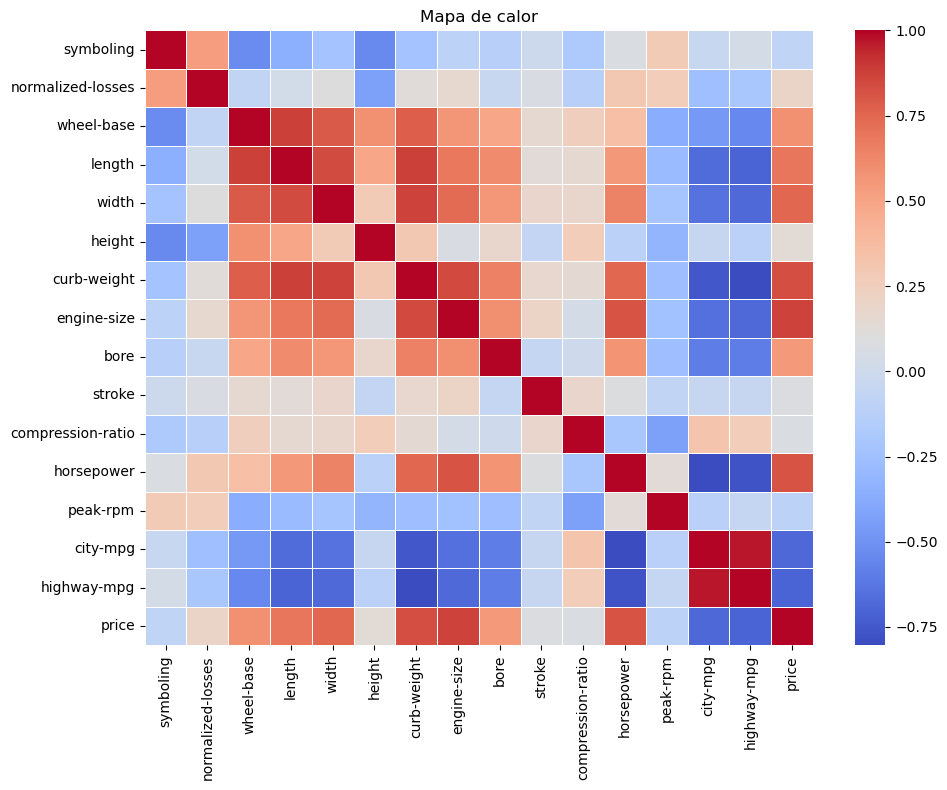

In [28]:
# variables numéricas
numerical_columns = df.select_dtypes(include=['int64','float64'])

# matriz de correlación
correlation_matrix = numerical_columns.corr()

# mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor')
plt.tight_layout()
plt.show()

### **3. Preparación y modelado de los datos**

Se dividen los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [29]:
# datos disponibles
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

A continuacion se realizara el preprocesamiento de los datos. 

In [30]:
# definicion de variables categoricas y target
x = df.drop(columns=['price'])
y = df[['price']]

In [32]:
# verificacion 
print("Variable target dimensiones" , y.shape)
print("Variables predictoras dimensiones" , x.shape)

Variable target dimensiones (205, 1)
Variables predictoras dimensiones (205, 25)


Separar los datos en train y test 

In [106]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

A continuacion se extraen las columnas categorias y numericas en variables distintas para aplicarles luego las transformaciones correspondientes.

In [107]:
# separar en columnas categoricas y numericas
numerical_features = [col for col in x_train.select_dtypes(include=['int64', 'float64']).columns if col != 'price']

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(categorical_features)
print(numerical_features)

['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']


In [108]:
# imputacion de valores faltantes y escalado
num_imputer = SimpleImputer(strategy='median')
num_scaler = RobustScaler()

In [109]:
# procesar las columnas numéricas
x_train_num = num_imputer.fit_transform(x_train[numerical_features])
x_train_num = num_scaler.fit_transform(x_train_num)

x_test_num = num_imputer.transform(x_test[numerical_features])
x_test_num = num_scaler.transform(x_test_num)

In [110]:
# convertir columnas categoricas a tipo string para evitar datos mixtos
x_train[categorical_features] = x_train[categorical_features].astype(str)
x_test[categorical_features] = x_test[categorical_features].astype(str)

In [111]:
# imputar valores nulos en columnas categóricas
x_train[categorical_features] = x_train[categorical_features].fillna("Missing")
x_test[categorical_features] = x_test[categorical_features].fillna("Missing")

print(x_train[categorical_features].isnull().sum())
print(x_test[categorical_features].isnull().sum())

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64
make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64


In [112]:
# procesar columnas categoricas
cat_encoder = OneHotEncoder(handle_unknown='ignore')

x_train_cat = cat_encoder.fit_transform(x_train[categorical_features]).toarray()
x_test_cat = cat_encoder.transform(x_test[categorical_features]).toarray()

# combinar columnas preprocesadas
x_train_processed = np.hstack([x_train_num, x_train_cat])
x_test_processed = np.hstack([x_test_num, x_test_cat])

In [119]:
# imputar valores faltantes con la mediana en y train 
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

### **3.1. Modelo de regresión**

In [120]:
# ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_processed, y_train)

LinearRegression()

In [121]:
# Hacer predicciones utilizando los datos procesados
y_train_pred = model.predict(x_train_processed)
y_test_pred = model.predict(x_test_processed)

In [122]:
# imprimir las predicciones 
print("Predicciones:", y_test_pred[:5])

Predicciones: [[ 5858.30239663]
 [16036.11670919]
 [12046.1354929 ]
 [  457.12949996]
 [ 9584.42875295]]


In [123]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 2456.4441868863832
Error cuadrático medio (MSE): 18518758.799648598
Coeficiente de determinación (R²): 0.7313817759794765


### **KNN**

A continuacion se adapta el flujo de trabajo anterior para aplicarlo utilizando el modelo KNN.

In [124]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [125]:
# columnas numéricas y categóricas
numerical_features = [col for col in x_train.select_dtypes(include=['int64', 'float64']).columns if col != 'price']
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

In [126]:
# preprocesamiento de columnas numéricas
num_imputer = SimpleImputer(strategy='median')
num_scaler = RobustScaler()

x_train_num = num_imputer.fit_transform(x_train[numerical_features])
x_train_num = num_scaler.fit_transform(x_train_num)

x_test_num = num_imputer.transform(x_test[numerical_features])
x_test_num = num_scaler.transform(x_test_num)

In [127]:
# preprocesamiento de columnas categóricas
x_train[categorical_features] = x_train[categorical_features].fillna("Missing").astype(str)
x_test[categorical_features] = x_test[categorical_features].fillna("Missing").astype(str)

cat_encoder = OneHotEncoder(handle_unknown='ignore')

x_train_cat = cat_encoder.fit_transform(x_train[categorical_features]).toarray()
x_test_cat = cat_encoder.transform(x_test[categorical_features]).toarray()

In [128]:
# combinar columnas numéricas y categóricas
x_train_processed = np.hstack([x_train_num, x_train_cat])
x_test_processed = np.hstack([x_test_num, x_test_cat])

In [129]:
# imputar valores faltantes con la mediana en y train 
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

In [130]:
# ajustar modelo con k=5
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train_processed, y_train)

KNeighborsRegressor()

In [131]:
# predicciones
y_train_pred = knn_model.predict(x_train_processed)
y_test_pred = knn_model.predict(x_test_processed)

In [132]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 2753.736585365854
Error cuadrático medio (MSE): 26203525.268292684
Coeficiente de determinación (R²): 0.6199127329862273


### **Decission trees**

Se adapta el flujo para aplicar arboles de decision 

In [137]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [138]:
# columnas numéricas y categóricas
numerical_features = [col for col in x_train.select_dtypes(include=['int64', 'float64']).columns if col != 'price']
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

In [139]:
# preprocesamiento de columnas numéricas
num_imputer = SimpleImputer(strategy='median')
num_scaler = RobustScaler()

x_train_num = num_imputer.fit_transform(x_train[numerical_features])
x_train_num = num_scaler.fit_transform(x_train_num)

x_test_num = num_imputer.transform(x_test[numerical_features])
x_test_num = num_scaler.transform(x_test_num)

In [140]:
# Imputar valores en columnas categóricas
x_train[categorical_features] = x_train[categorical_features].fillna("Missing")
x_test[categorical_features] = x_test[categorical_features].fillna("Missing")

In [141]:
# categóricas a string
x_train[categorical_features] = x_train[categorical_features].astype(str)
x_test[categorical_features] = x_test[categorical_features].astype(str)

In [142]:
# encoder
cat_encoder = OneHotEncoder(handle_unknown='ignore')

x_train_cat = cat_encoder.fit_transform(x_train[categorical_features]).toarray()
x_test_cat = cat_encoder.transform(x_test[categorical_features]).toarray()

In [143]:
# combinar columnas numéricas y categóricas
x_train_processed = np.hstack([x_train_num, x_train_cat])
x_test_processed = np.hstack([x_test_num, x_test_cat])

In [144]:
# imputar valores faltantes con la mediana en y train 
y_train = y_train.fillna(y_train.median())
y_test = y_test.fillna(y_test.median())

In [145]:
# ajustar modelo
tree_model = DecisionTreeRegressor(random_state=0, max_depth=10) 
tree_model.fit(x_train_processed, y_train)


DecisionTreeRegressor(max_depth=10, random_state=0)

In [146]:
# predicciones
y_train_pred = tree_model.predict(x_train_processed)
y_test_pred = tree_model.predict(x_test_processed)

In [147]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 2712.429268292683
Error cuadrático medio (MSE): 26265120.978102982
Coeficiente de determinación (R²): 0.619019275149472


El modelo de regresion lineal tiene resultados un poco mas favorables, aunque las relaciones no sean completamente lineales, este modelo parece capturar mejor las relaciones en comparacion a KNN y Arboles de decision segun mi implementacion. 